In [1]:
#import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

#from sklearn.preprocessing import StandardScaler

from scipy.sparse import coo_matrix, hstack



In [157]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

In [214]:
dataset = pd.read_csv('Cleaned_Posts.csv', nrows = 5000, index_col=0)
dataset.shape

(5000, 10)

In [198]:
dataset.head()

,TText,TText_NEG,PText,TCode,PCode,TTitle,TTitle_NEG,Title,TagsSet,Tags
Id,,,,,,,,,,
48046688,hi tri instal python packag call pysptk ubuntu...,hi tri instal python packag call pysptk ubuntu...,Hi I was trying to install a python package c...,pip install pysptk / usr / bin / ld : cannot f...,pip install pysptk\n /usr/bin/ld: cannot find ...,tri instal pythonn packag encount `` find -lgc...,tri instal pythonn packag encount `` find_NEG ...,tried to install a pythonn package but encount...,"{'html', 'p', 'code', 'body', 'pre'}",<python><gcc>
48046690,tri make chrome extens display differ text pop...,tri make chrome extens display differ text pop...,I am trying to make a chrome extension that d...,"< script src ="" popup . js ""> </ script >< htm...","<script src=""popup.js""></script>\n<html>\n<hea...",updat chrome extens popup text,updat chrome extens popup text,Update chrome extension popup text,"{'html', 'p', 'code', 'strong', 'body', 'pre'}",<javascript><html><google-chrome-extension>
48046378,call dll python use ctype want pass ctype arra...,call dll python use ctype want pass ctype arra...,"Calling a dll from Python using ctypes, I wan...",ReturnVec = ctypes . c_float * len ( arrA ) t ...,ReturnVec = ctypes.c_float * len(arrA)\nt = ty...,python ctype pass ctype array dll,python ctype pass ctype array dll,Python ctypes: how to pass ctypes array to DLL?,"{'html', 'p', 'code', 'blockquote', 'body', 'p...",<python><ctypes>
48046379,django app user creat video collag use multipl...,django app user creat video collag use multipl...,I have a Django app with which users can crea...,client_max_body_size 100M fastcgi_buffers 16k ...,client_max_body_size 100M\n fastcgi_buffers 8 ...,nginx gunicorn bad gateway upstream prematur c...,nginx gunicorn bad gateway upstream prematur c...,nginx gunicorn 502 bad gateway: upstream prema...,"{'html', 'p', 'code', 'body', 'pre'}",<python><django><nginx>
48046382,'m tri implement hittest use arkit line inters...,'m tri implement hittest use arkit line inters...,I'm trying to implement hittest that is used ...,"std :: pair < bool , double > linePlaneInterse...","std::pair<bool, double> linePlaneIntersection...",implement hit test,implement hit test,Implementing hit test,"{'html', 'p', 'pre', 'code', 'body', 'a'}",<c++><opencv><3d><computer-vision><arkit>


In [253]:
#Features vectorisation
cvect = CountVectorizer(tokenizer=None, vocabulary=None, ngram_range = (1,3))

In [254]:
#Dimension reduction
lda = LatentDirichletAllocation(learning_method='batch', random_state=0, n_components=30)

In [270]:
#Kmean creation
kmeans = KMeans(random_state=0, n_clusters=100)

In [271]:
#pipeline creation
pipe = [('cvect', cvect), ('lda', lda), ('kmeans', kmeans)]
kpipeline = Pipeline(pipe)

In [272]:
kpipeline.fit(dataset['TTitle'].fillna('-'))

Pipeline(memory=None,
     steps=[('cvect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        stri...=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [273]:
labels = kpipeline.predict(dataset['TTitle'].fillna('-'))
labels

array([33, 19, 16, ..., 56, 17, 34], dtype=int32)

In [274]:
mask = np.where(labels == 1)
dataset[['Title', 'Tags']].iloc[mask]

,Title,Tags
Id,,
48046736,Fullstack module reuse with webpack,<javascript><node.js><typescript><webpack><rea...
48047213,Ajax Call returns status 0 in mvc,<c#><ajax><asp.net-mvc><asp.net-ajax>
48048193,what is the replacement for 'overflowchanged' ...,<javascript><jquery><html><css>
48046493,Create a model with a required relationship,<php><laravel><laravel-5><eloquent><laravel-el...
48048750,Using signal processing library in scipy,<python><scipy>
48046520,Pandas manual label encoding,<python><pandas>
48048391,What is -D__USE_FIXED_PROTOTYPES__ in GCC used...,<c><unix><gcc><makefile>
48048395,Firestore pagination in angular,<angular><pagination><google-cloud-firestore>
48047414,freqpoly ignore certain legends,<r><ggplot2>


In [153]:
#Gridsearch creation
parameters = {'cvect__ngram_range':[(1,1), (1,2), (1,3)] , 'cvect__max_df':[0.9, 1,],
              'kmeans__n_clusters':range(35,50,5),
              'lda__n_components':range(30,50,5),}
ksearch = GridSearchCV(kpipeline, parameters, n_jobs=-1, cv=2, verbose = 3)

In [154]:
ksearch.fit(dataset['TText'].fillna('-'))

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=30 
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=30 
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=35 
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=35 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=30, score=-586.0892419428579, total=  44.0s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=35, score=-627.7090620022634, total=  44.4s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 1), kmeans__n_clusters=35, lda__n_compon

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.9min


[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=30, score=-627.4221426483341, total=  46.7s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=30, score=-590.8020256310411, total=  48.6s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=35, score=-688.5564792643921, total=  46.7s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=45 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=35, score=-645.2048986725325, total=  48.9s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=45 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 2), kmeans__n_cluste

[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=40, lda__n_components=45 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=40, lda__n_components=40, score=-705.1562478820804, total=  47.4s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=45, lda__n_components=30 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=40, lda__n_components=40, score=-652.6198845191589, total=  49.8s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=45, lda__n_components=30 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=40, lda__n_components=45, score=-720.7690351504655, total=  48.7s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=45, lda__n_components=35 
[CV]  cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_clusters=40, lda__n_components=45, score=-677.2825346367373, total=  50.5s
[CV] cvect__max_df=0.9, cvect__ngram_range=(1, 3), kmeans__n_cluster

[CV] cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=35 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=30, score=-124.23441518039937, total=   9.5s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=30, score=-138.3866278011534, total=   9.3s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=35, score=-142.5105045905545, total=  10.1s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=45 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_components=35, score=-155.18836973618838, total=  10.0s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 2), kmeans__n_clusters=35, lda__n_com

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 17.2min


[CV]  cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=30, score=-101.48915588334748, total=  11.1s
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=30, score=-121.2196663387738, total=  11.1s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=40 
[CV] cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=40 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=35, score=-116.85394189054807, total=  11.5s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=45 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=35, score=-137.0497826016609, total=  11.5s
[CV] cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_components=45 
[CV]  cvect__max_df=1, cvect__ngram_range=(1, 3), kmeans__n_clusters=35, lda__n_co

[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 18.5min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...s=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)], 'cvect__max_df': [0.9, 1], 'kmeans__n_clusters': range(35, 50, 5), 'lda__n_components': range(30, 50, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [ ]:
ksearch.estimator.named_steps['cvect'].fit(dataset['TText'].fillna('-'))
#ksearch.predict(dataset['TText'].fillna('-'))

In [155]:
ksearch.best_params_

{'cvect__max_df': 1,
 'cvect__ngram_range': (1, 3),
 'kmeans__n_clusters': 45,
 'lda__n_components': 30}

In [156]:
ksearch.best_score_

-93.75922452171811

In [215]:
cvectinit = {'tokenizer':None, 'vocabulary':None}
cvect = CountVectorizer()

ldainit = {'learning_method':'batch', 'random_state':0}
lda = LatentDirichletAllocation()

kmeansinit = {'random_state':0}
kmeans = KMeans()

def clusteringgrid(sequence, params, data):
    reddimscore = {}
    clusteringscore = {}
    silhouettescore = {}
    indexcalc = 0
    for vectparam in list(ParameterGrid(params[0])):
        cvect = sequence[0]
        cvect.set_params(**{**cvectinit, **vectparam})
        bagwords = cvect.fit_transform(data)
        print('{} - {} done'.format(indexcalc, vectparam))
        
        for ldaparam in list(ParameterGrid(params[1])):
            lda = sequence[1]
            lda.set_params(**{**ldainit, **ldaparam})
            matrix = lda.fit_transform(bagwords)
            print('{} - {} done'.format(indexcalc , ldaparam))
            
            for kmeansparam in list(ParameterGrid(params[2])):
                kmeans = sequence[2]
                kmeans.set_params(**{**kmeansinit, **kmeansparam})
                kmeans.fit(matrix)
                reddimscore[indexcalc] = [lda.score(matrix), {**ldaparam, **vectparam}]
                cscore = kmeans.score(matrix)
                clusteringscore[indexcalc] = [cscore, {**vectparam, **ldaparam, **kmeansparam}]
                csilhouette = silhouette_score(matrix, kmeans.labels_)
                silhouettescore[indexcalc] = [csilhouette, {**vectparam, **ldaparam, **kmeansparam}]
                print('{} - {} done'.format(indexcalc, kmeansparam))
                indexcalc += 1
                #print(reddimscore, clusteringscore, silhouettescore)
    return reddimscore, clusteringscore, silhouettescore


#clusteringgrid([cvect], [{'max_df': [1.]}, ], dataset['TText'].fillna('-'))

In [266]:
cvectinit = {'tokenizer':None, 'vocabulary':None}
cvect = CountVectorizer()

ldainit = {'learning_method':'batch', 'random_state':0}
lda = LatentDirichletAllocation()

kmeansinit = {'random_state':0}
kmeans = KMeans()

reddimscore, clusteringscore, silhouettescore = clusteringgrid([cvect, lda, kmeans],
               [{'ngram_range':[ (1,3)], 'max_features':[None,], 'max_df':[1.], 'min_df':[1]},  ### Params to test for cvetc
                {'n_components':range(30,40,10), },  ### Params for LDA
                {'n_clusters':range(50,101,25)}], ### Params for kmeans
                dataset['TText'].fillna('-'))

0 - {'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 3)} done
0 - {'n_components': 30} done
0 - {'n_clusters': 50} done
1 - {'n_clusters': 75} done
2 - {'n_clusters': 100} done


In [267]:
reddimscore
reversedict  = dict((v[0],k) for k,v in reddimscore.items())
bestscore = np.array([x for x in reversedict.keys()]).max()
bestindex = reversedict[bestscore]
reddimscore[bestindex]

[-1.7210072841221549,
 {'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'n_components': 30,
  'ngram_range': (1, 3)}]

In [268]:
clusteringscore
reversedict  = dict((v[0],k) for k,v in clusteringscore.items())
bestscore = np.array([x for x in reversedict.keys()]).max()
bestindex = reversedict[bestscore]
clusteringscore[bestindex]

[-1.7210072841221549,
 {'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'n_clusters': 100,
  'n_components': 30,
  'ngram_range': (1, 3)}]

In [269]:
silhouettescore
reversedict  = dict((v[0],k) for k,v in silhouettescore.items())
bestscore = np.array([x for x in reversedict.keys()]).max()
bestindex = reversedict[bestscore]
silhouettescore[bestindex]

[0.96179284445992341,
 {'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'n_clusters': 50,
  'n_components': 30,
  'ngram_range': (1, 3)}]

In [132]:
silhouette_score(dataset['TText'].fillna('-'), ksearch.predict(dataset['TText'].fillna('-')))

ValueError: could not convert string to float: "follow bison grammar yield reduce/reduc conflict see ambigu left_parenthesi name right_parenthesi must formula becaus relation_infix begin bison 's verbos output seem confus right_parenthesi state seem accept name right_parenthesi even though grammar requir left_parenthesi befor ani idea edit grammar abov simplifi focus reduce/reduc conflict real intent pars first-ord logic formula term combin oper formula logic combin impli relat term term formula sometim long express give name call easili name eventu expand tree connector oper later program bison parser among termin symbol variabl object model logic formula statement object similar type function c++ name scheme use"

In [3]:
#Prints all the parameters

for segment in picklecorpus:
    print(segment)
    for key in picklecorpus[segment]:
        params = picklecorpus.get(segment, None)[key]['parameters']
        datashape = picklecorpus.get(segment, None)[key]['Word_freq'].shape
        print('{} - {}\n    Datashape : {}\n'.format(key , params, datashape))

CodeAnalysis
0 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (1, 1)}
    Datashape : (50000, 66168)

1 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (1, 2)}
    Datashape : (50000, 342882)

2 - {'max_df': 0.8, 'min_df': 2, 'ngram_range': (2, 2)}
    Datashape : (50000, 276714)

3 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (1, 1)}
    Datashape : (50000, 12067)

4 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (1, 2)}
    Datashape : (50000, 38951)

5 - {'max_df': 0.8, 'min_df': 10, 'ngram_range': (2, 2)}
    Datashape : (50000, 26884)

6 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 1)}
    Datashape : (50000, 66168)

7 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 2)}
    Datashape : (50000, 342882)

8 - {'max_df': 1.0, 'min_df': 2, 'ngram_range': (2, 2)}
    Datashape : (50000, 276714)

9 - {'max_df': 1.0, 'min_df': 10, 'ngram_range': (1, 1)}
    Datashape : (50000, 12067)

10 - {'max_df': 1.0, 'min_df': 10, 'ngram_range': (1, 2)}
    Datashape : (50000, 38951)

11 - {'ma

In [4]:
#Dataset definition
iterations = {'CodeAnalysis':7, 'TitleAnalysis':7, 'TextAnalysis':7}

#parameter verification
for key in iterations.keys():
    params = picklecorpus.get(key, None)[iterations[key]]['parameters']
    print('Parameter for text {} --> {}'.format(key, params))
    datashape = picklecorpus.get(key, None)[iterations[key]]['Word_freq'].shape
    print('dataset shape : {}'.format(datashape))

Parameter for text CodeAnalysis --> {'max_df': 1.0, 'min_df': 2, 'ngram_range': (1, 2)}
dataset shape : (50000, 342882)
Parameter for text TitleAnalysis --> {'max_df': 1.0, 'min_df': 5, 'ngram_range': (1, 2)}
dataset shape : (50000, 9835)
Parameter for text TextAnalysis --> {'max_df': 1.0, 'min_df': 5, 'ngram_range': (1, 2)}
dataset shape : (50000, 75611)


In [5]:
#dataset creation
Titleset = picklecorpus.get('TitleAnalysis', None)[iterations['TitleAnalysis']]['Word_freq']
Textset = picklecorpus.get('TextAnalysis', None)[iterations['TextAnalysis']]['Word_freq']
Codeset = picklecorpus.get('CodeAnalysis', None)[iterations['CodeAnalysis']]['Word_freq']

X = hstack((Titleset, Textset, Codeset))

X.shape

(50000, 428328)

In [6]:
#Main tag loading
def load_obj(name):
    with open('maintaglist.pkl', 'rb') as f:
        return pickle.load(f)
maintaglist = load_obj('maintaglist')
maintaglist

{'.net': 18,
 'ajax': 27,
 'android': 5,
 'angularjs': 20,
 'arrays': 19,
 'asp.net': 14,
 'c': 17,
 'c#': 3,
 'c++': 9,
 'css': 11,
 'html': 8,
 'ios': 10,
 'iphone': 23,
 'java': 2,
 'javascript': 1,
 'jquery': 6,
 'json': 21,
 'mysql': 12,
 'node.js': 25,
 'objective-c': 16,
 'php': 4,
 'python': 7,
 'r': 24,
 'regex': 28,
 'ruby': 26,
 'ruby-on-rails': 15,
 'sql': 13,
 'sql-server': 22,
 'swift': 29,
 'xml': 30}

In [7]:
#dataloading

#To copy paste in the list of parameters below to limit the dataset size
#postsdf = pd.read_csv('posts with tags.csv', nrows = 50, index_col=0, parse_dates=['CreationDate', 'DeletionDate', 'LastEditDate', 'LastActivityDate', 'ClosedDate'])

#complete loading
postsdf = pd.read_csv('posts with tags.csv', index_col=0, parse_dates=['CreationDate', 'DeletionDate', 'LastEditDate', 'LastActivityDate', 'ClosedDate'])
postsdf.head()

,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
Id,,,,,,,,,,,,,,,,,,,,,
48046688,1,NaN,NaN,2018-01-01 01:43:05,NaT,0,32,<p>Hi I was trying to install a python package...,9159552.0,NaN,...,NaN,2018-01-01 02:50:41,2018-01-01 02:50:41,tried to install a pythonn package but encount...,<python><gcc>,0,0,NaN,NaT,NaN
48046690,1,NaN,NaN,2018-01-01 01:44:46,NaT,0,39,<p>I am trying to make a chrome extension that...,9159517.0,NaN,...,NaN,2018-01-01 16:59:50,2018-01-01 16:59:50,Update chrome extension popup text,<javascript><html><google-chrome-extension>,0,3,NaN,NaT,NaN
48046378,1,NaN,NaN,2018-01-01 00:00:29,NaT,0,39,<p>Calling a <em>dll</em> from Python using <e...,8276973.0,NaN,...,NaN,2018-01-01 03:16:54,2018-01-03 08:21:23,Python ctypes: how to pass ctypes array to DLL?,<python><ctypes>,2,0,NaN,NaT,NaN
48046379,1,NaN,NaN,2018-01-01 00:00:32,NaT,0,390,<p>I have a Django app with which users can cr...,1745384.0,NaN,...,NaN,2018-01-01 03:18:33,2018-01-11 23:14:31,nginx gunicorn 502 bad gateway: upstream prema...,<python><django><nginx>,1,0,1.0,NaT,NaN
48046382,1,NaN,NaN,2018-01-01 00:00:52,NaT,0,44,<p>I'm trying to implement hittest that is use...,8794406.0,NaN,...,NaN,NaT,2018-01-01 00:00:52,Implementing hit test,<c++><opencv><3d><computer-vision><arkit>,0,0,NaN,NaT,NaN


In [8]:
#Tags parsing on dataset

def maintagclass(entry):
    for tag in entry:
        if tag in maintaglist:
            return maintaglist[tag]
    return -1

postsdf['PTags'] = postsdf['Tags'].apply(lambda x: [tag.name for tag in BeautifulSoup(x, 'html.parser').find_all()])
postsdf['MainTag'] = postsdf['PTags'].apply(maintagclass)
postsdf[['MainTag', 'PTags', 'Tags']].head(20)

,MainTag,PTags,Tags
Id,,,
48046688,7,"[python, gcc]",<python><gcc>
48046690,1,"[javascript, html, google-chrome-extension]",<javascript><html><google-chrome-extension>
48046378,7,"[python, ctypes]",<python><ctypes>
48046379,7,"[python, django, nginx]",<python><django><nginx>
48046382,9,"[c++, opencv, computer-vision, arkit]",<c++><opencv><3d><computer-vision><arkit>
48046691,-1,"[python-3.x, validation, tkinter, tkinter-entry]",<python-3.x><validation><tkinter><tkinter-entry>
48046692,13,"[sql, sql-server, ssas, ssas-2012]",<sql><sql-server><ssas><ssas-2012>
48046694,2,"[java, android, caching, sharedpreferences]",<java><android><caching><sharedpreferences>
48046383,-1,[karate],<karate>


In [16]:
#TruncatedSVD calculation
nmfmodel = NMF(n_components=2, init='nndsvd', random_state=0)
Xnmf = nmfmodel.fit_transform(X)
Xnmf.shape

(50000, 2)

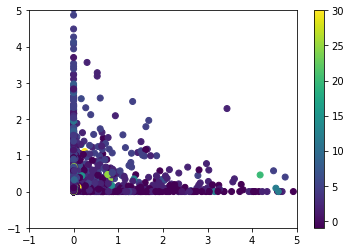

In [17]:
#results visualisation

plt.scatter(Xnmf[:, 0], Xnmf[:, 1], c = postsdf['MainTag'])

plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.colorbar()
plt.show()


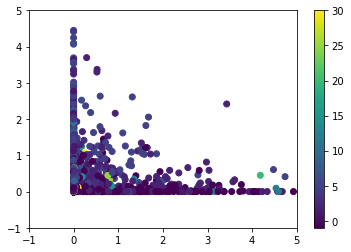

In [19]:
#Analysis limited to the code


nmfmodel = NMF(n_components=2, init='nndsvd', random_state=0)
XCodenmf = nmfmodel.fit_transform(Codeset)

#results visualisation

plt.scatter(XCodenmf[:, 0], XCodenmf[:, 1], c = postsdf['MainTag'])

plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.colorbar()
plt.show()
